In [1]:
import pandas
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib inline

tab = pandas.read_csv('data/survey_results_public.csv')
czsk = tab[(tab['Country'] == 'Czech Republic') | (tab['Country'] == 'Slovak Republic')]

In [2]:
print('Kolik lidí celkem vyplnilo dotazník?')
len(tab)

Kolik lidí celkem vyplnilo dotazník?


51392

In [3]:
print('Kolik z nich bylo z ČR/SR?')
len(tab[(tab['Country'] == 'Czech Republic') | (tab['Country'] == 'Slovak Republic')])

Kolik z nich bylo z ČR/SR?


581

In [4]:
salaryczsk = czsk[czsk['Salary'].notnull()]
print('Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? (€/rok)')
salaryczsk['Salary'].mean()

Jaká je, podle dotazníku, průměrná mzda programátorů v ČR/SR? (€/rok)


21211.712109970078

In [21]:
salaryall1 = tab[tab['Salary'].notnull()]
salaryall = salaryall1.fillna('Euros')
salaryall.loc[salaryall['Currency'] == 'U.S. dollars ($)', 'Salary'] *= 0.859143434
salaryall.loc[salaryall['Currency'] == 'Canadian dollars (C$)', 'Salary'] *= 0.667726277
salaryall.loc[salaryall['Currency'] == 'British pounds sterling (£)', 'Salary'] *= 1.12520951
salaryall.loc[salaryall['Currency'] == 'Brazilian reais (R$)', 'Salary'] *= 0.261249731
salaryall.loc[salaryall['Currency'] == 'Polish zloty (zl)', 'Salary'] *= 0.235350896
salaryall.loc[salaryall['Currency'] == 'Indian rupees (?)', 'Salary'] *= 0.01323
salaryall.loc[salaryall['Currency'] == 'Swedish kroner (SEK)', 'Salary'] *= 0.102745283
salaryall.loc[salaryall['Currency'] == 'Russian rubles (?)', 'Salary'] *= 0.0147904938
salaryall.loc[salaryall['Currency'] == 'Swiss francs', 'Salary'] *= 0.859647
salaryall.loc[salaryall['Currency'] == 'Mexican pesos (MXN$)', 'Salary'] *= 0.0448785938
salaryall.loc[salaryall['Currency'] == 'Australian dollars (A$)', 'Salary'] *= 0.657428338
salaryall.loc[salaryall['Currency'] == 'Japanese yen (¥)', 'Salary'] *= 0.00753964502
salaryall.loc[salaryall['Currency'] == 'Chinese yuan renminbi (¥)', 'Salary'] *= 0.129195926
salaryall.loc[salaryall['Currency'] == 'Singapore dollars (S$)', 'Salary'] *= 0.628206627
salaryall.loc[salaryall['Currency'] == 'South African rands (R)', 'Salary'] *= 0.0607529331
salaryall.loc[salaryall['Currency'] == 'Bitcoin (btc)', 'Salary'] *= 5032
print('Ve světě? (€/rok)')
salaryall['Salary'].mean()

Ve světě? (€/rok)


125455.12314366824

In [6]:
have = czsk[czsk['HaveWorkedLanguage'].notnull()]
have2 = have[have['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik lidí z ČR/SR uvedlo, že používá Python?')
len(have2[['HaveWorkedLanguage']])

Kolik lidí z ČR/SR uvedlo, že používá Python?


129

In [7]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Python')]
want4 = want3[want3['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik z nich chce v používání Pythonu pokračovat?')
len(want4)

Kolik z nich chce v používání Pythonu pokračovat?


86

In [8]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Python')]
want4 = want3[~want3['HaveWorkedLanguage'].str.contains('Python')]
print('Kolik lidí Python nepoužívá, ale chce ho začít používat?')
len(want4)

Kolik lidí Python nepoužívá, ale chce ho začít používat?


47

In [9]:
have = czsk[czsk['HaveWorkedLanguage'].notnull()]
have2 = have[have['HaveWorkedLanguage'].str.contains('Java;|Java$')]
print('Kolik lidí z ČR/SR uvedlo, že používá Javu?')
len(have2[['HaveWorkedLanguage']])

Kolik lidí z ČR/SR uvedlo, že používá Javu?


171

In [10]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Java$|Java;')]
want4 = want3[want3['HaveWorkedLanguage'].str.contains('Java$|Java;')]
print('Kolik z nich chce v používání Javy pokračovat?')
len(want4)

Kolik z nich chce v používání Javy pokračovat?


98

In [11]:
want = czsk[czsk['WantWorkLanguage'].notnull()]
want2 = want[want['HaveWorkedLanguage'].notnull()]
want3 = want2[want2['WantWorkLanguage'].str.contains('Java$|Java;')]
want4 = want3[~want3['HaveWorkedLanguage'].str.contains('Java$|Java;')]
print('Kolik lidí Javu nepoužívá, ale chce ji začít používat?')
len(want4)

Kolik lidí Javu nepoužívá, ale chce ji začít používat?


21

Vykreslete graf, který pro každý jazyk ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají (podle dat dostupných z dotazníku)(€/měsíc) Pozn. pokud bylo pole 'Currency' prazdne, automaticky pocita s eurem.


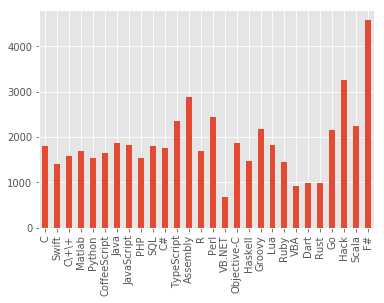

In [12]:
p = czsk[czsk['HaveWorkedLanguage'].notnull()]
a = p['HaveWorkedLanguage']
split = pandas.DataFrame(a.str.split('; ').tolist()).stack().str.replace('+', '\+')
langs = split.unique()
salary = czsk[czsk['Salary'].notnull()]
# curr = czsk[czsk['Currency'].notnull()]
# curr['Currency'].unique() - pro zjisteni, jake meny existuji
arr1 = salary[salary['HaveWorkedLanguage'].notnull()]
arr = arr1.fillna('Euros')
arr.loc[arr['Currency'] == 'U.S. dollars ($)', 'Salary'] *= 0.859143434
arr.loc[arr['Currency'] == 'Canadian dollars (C$)', 'Salary'] *= 0.667726277
list = []
for i in range(0, langs.size):
    vysek = arr[arr['HaveWorkedLanguage'].str.contains(langs[i])]
    list.append(vysek['Salary'].mean() // 12)
vysledek = pandas.Series(list, index=langs)
print('Vykreslete graf, který pro každý jazyk ukáže průměrnou měsíční mzdu lidí z ČR/SR, kteří tento jazyk používají (podle dat dostupných z dotazníku)(€/měsíc) Pozn. pokud bylo pole \'Currency\' prazdne, automaticky pocita s eurem.')
vysledek1 = vysledek.dropna()
vysledek1.fillna(0).plot.bar()

In [13]:
print('Nasledujici seznam zobrazuje jazyky s neurcitou prumernou mesicni mzdou:')
list1 = vysledek[vysledek.isnull()]
list1

Nasledujici seznam zobrazuje jazyky s neurcitou prumernou mesicni mzdou:


Smalltalk        NaN
Visual Basic 6   NaN
Elixir           NaN
Erlang           NaN
Clojure          NaN
Common Lisp      NaN
dtype: float64